In [1]:
import os
os.chdir('/home/soham/Desktop/GitHub/BTP/scripts/4 Sensors/')

from utils import add_noise, plot_lda_decision_boundary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


analyte1 = pd.read_csv('/home/soham/Desktop/GitHub/BTP/data/4sensors/analyte1_4sensors.csv')
analyte2 = pd.read_csv('/home/soham/Desktop/GitHub/BTP/data/4sensors/analyte2_4sensors.csv')
analyte3 = pd.read_csv('/home/soham/Desktop/GitHub/BTP/data/4sensors/analyte3_4sensors.csv')

data = pd.concat([analyte1, analyte2, analyte3], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Unnamed: 0,CFU/mL,Sensor1,Sensor2,Sensor3,Sensor4,label
0,24,3.077431e+07,-67.921786,70.456705,52.799548,411.783045,1
1,20,4.893367e+07,-87.550909,100.119235,61.843525,893.464761,2
2,7,4.920000e+04,-277.040000,13.000000,-4.650000,987.721490,2
3,18,5.043309e+06,-255.112038,78.744411,54.519829,924.496221,2
4,8,2.880000e+04,139.061000,-60.100000,28.140000,688.143386,3


In [2]:
combination = []
svm_train_acc = []
svm_test_acc = []
rfc_train_acc = []
rfc_test_acc = []

## LDA using all 4 sensors

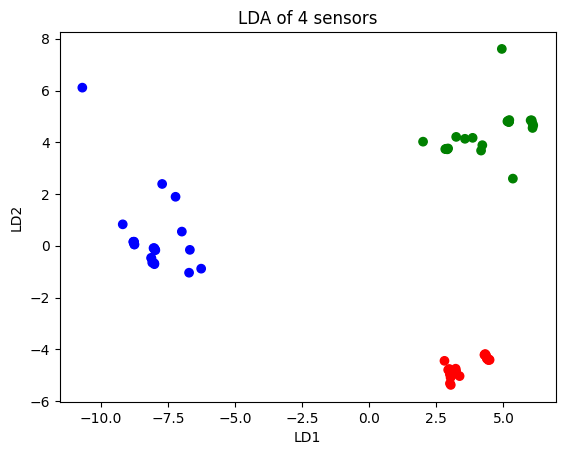

In [3]:
data = data.drop(['Unnamed: 0','CFU/mL'], axis=1)

X = data[['Sensor1', 'Sensor2', 'Sensor3', 'Sensor4']]
Y = data['label'].reset_index(drop=True)

lda = LDA(n_components=2)
X_r = lda.fit_transform(X, Y).T

lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])
plt.scatter(lda_data['LD1'], lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of 4 sensors')
plt.show()

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


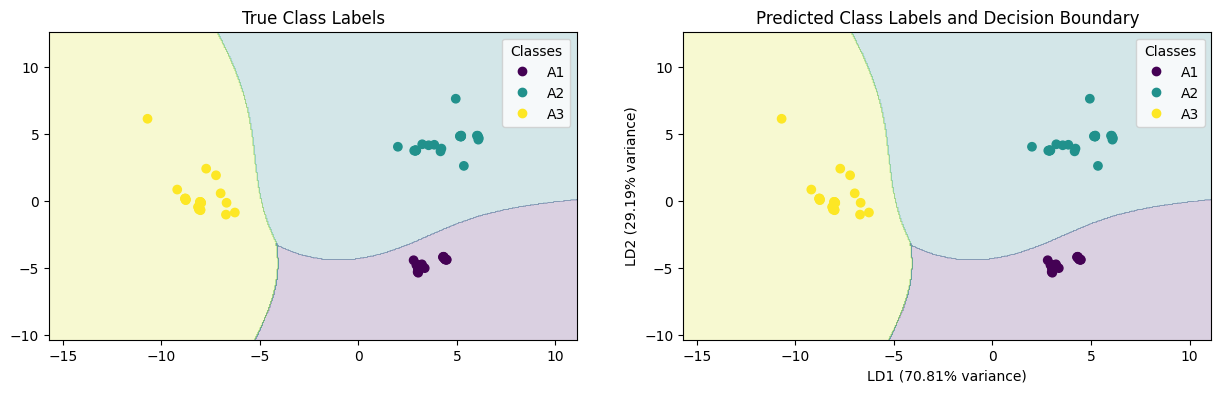

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

combination.append('S1-S2-S3-S4')

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


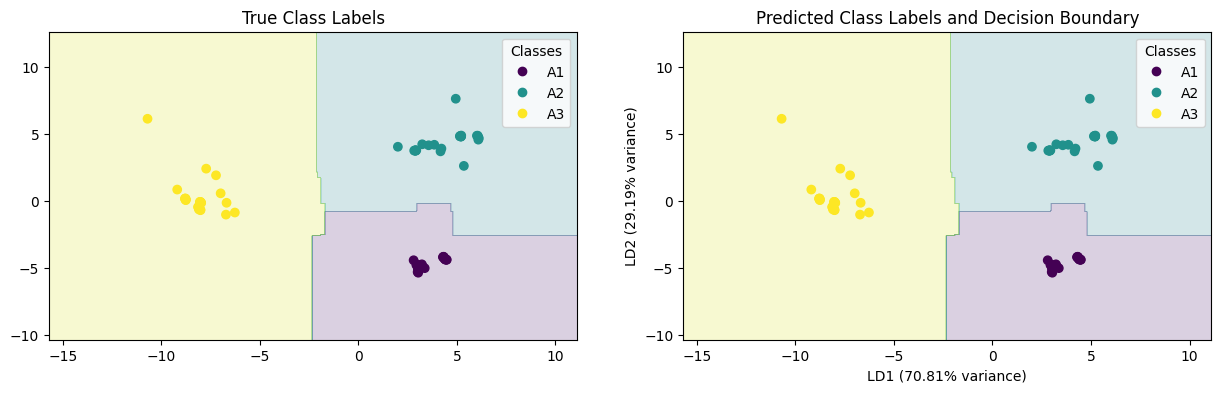

In [5]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, lda_data, rfc, label_mapping)

## LDA using S1, S2

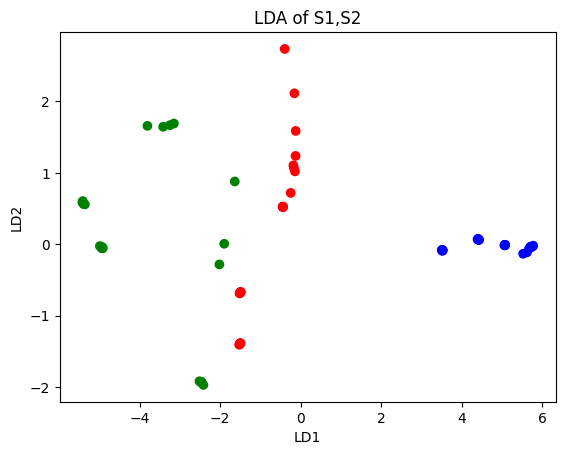

In [6]:
s1_s2_X = data[['Sensor1', 'Sensor2']]

combination.append('S1-S2')

lda = LDA(n_components=2)
X_r = lda.fit_transform(s1_s2_X, Y).T

s1_s2_lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])

plt.scatter(s1_s2_lda_data['LD1'], s1_s2_lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of S1,S2')
plt.show()

Training accuracy = 0.95
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


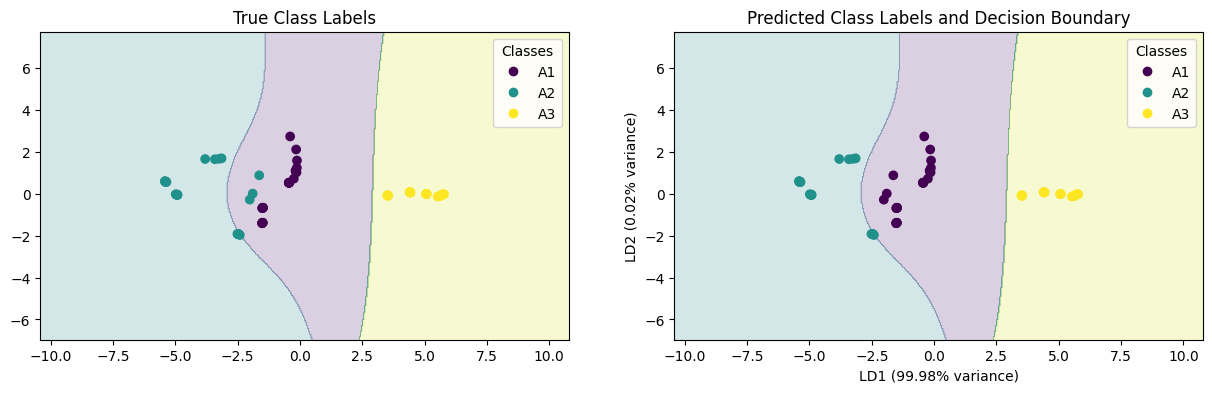

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s2_lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s2_lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, s1_s2_lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


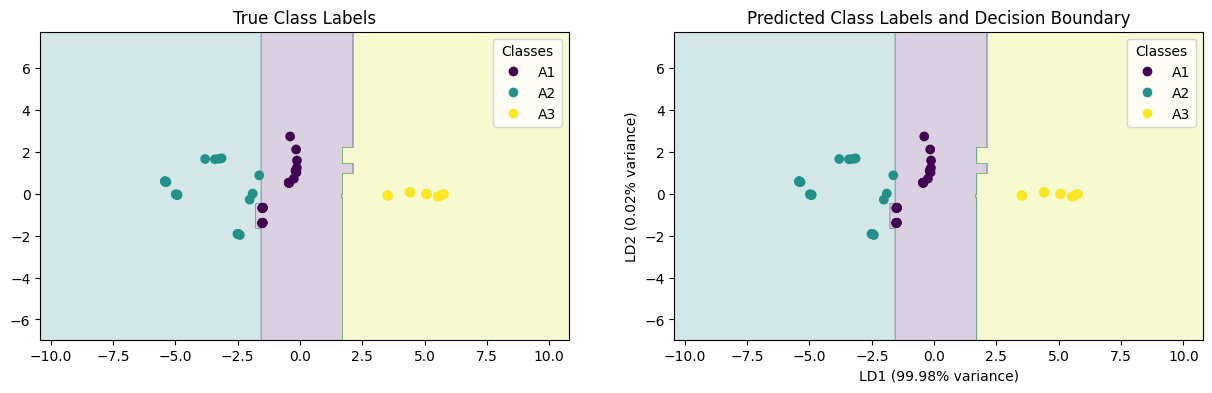

In [8]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, s1_s2_lda_data, rfc, label_mapping)

## LDA using S1, S3

In [9]:
s1_s3_X = data[['Sensor1', 'Sensor3']]

combination.append('S1-S3')

lda = LDA(n_components=2)
X_r = lda.fit_transform(s1_s3_X, Y).T

s1_s3_lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])
s1_s3_lda_data.head()

,LD1,LD2
0,-0.027943,-0.604943
1,-0.359900,-0.813664
2,-3.960158,0.423658
3,-3.411086,-0.808006
4,3.654362,0.100813


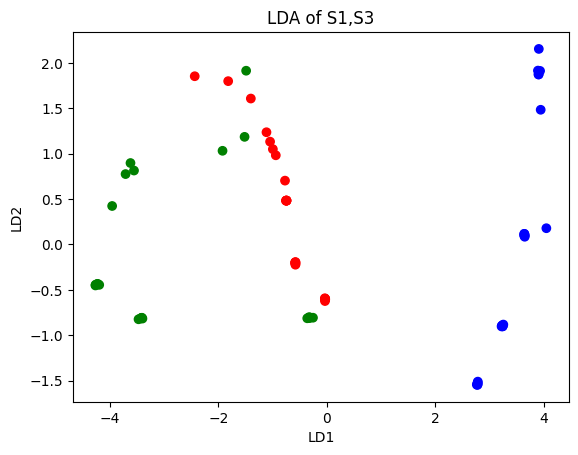

In [10]:
plt.scatter(s1_s3_lda_data['LD1'], s1_s3_lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of S1,S3')
plt.show()

Training accuracy = 0.8666666666666667
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


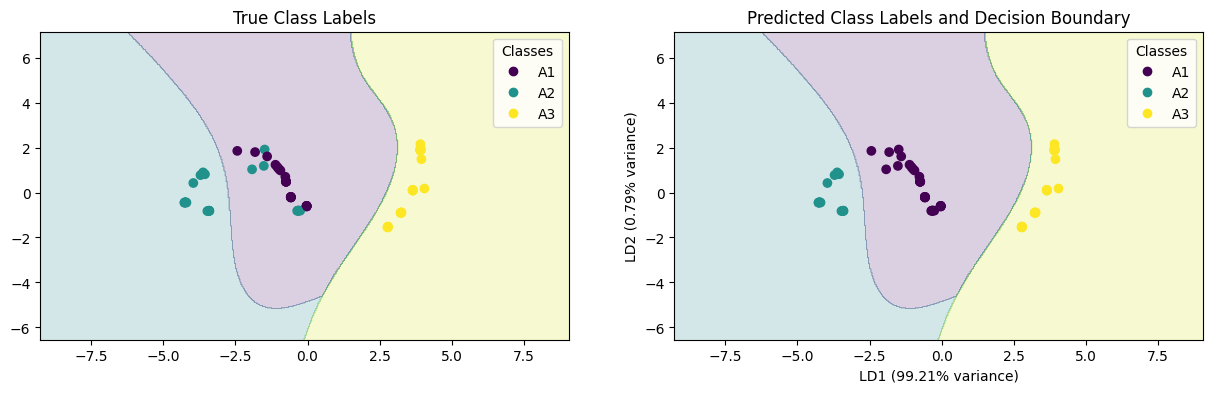

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s3_lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s3_lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, s1_s3_lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


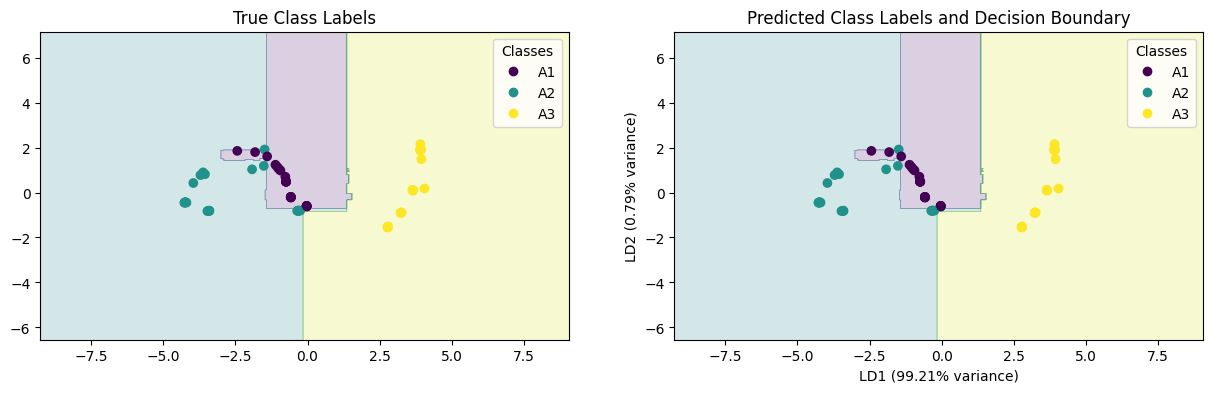

In [12]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, s1_s3_lda_data, rfc, label_mapping)

## LDA using S1, S4

In [13]:
s1_s4_X = data[['Sensor1', 'Sensor4']]

combination.append('S1-S4')

lda = LDA(n_components=2)
X_r = lda.fit_transform(s1_s4_X, Y).T

s1_s4_lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])
s1_s4_lda_data.head()

,LD1,LD2
0,0.967035,2.163082
1,-1.046616,-1.076777
2,-4.634655,-0.597348
3,-4.037410,-0.288146
4,3.566539,-1.004666


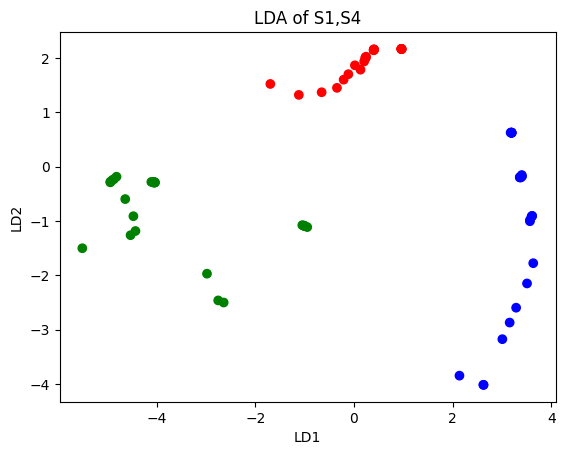

In [14]:
plt.scatter(s1_s4_lda_data['LD1'], s1_s4_lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of S1,S4')
plt.show()

Training accuracy = 0.9166666666666666
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


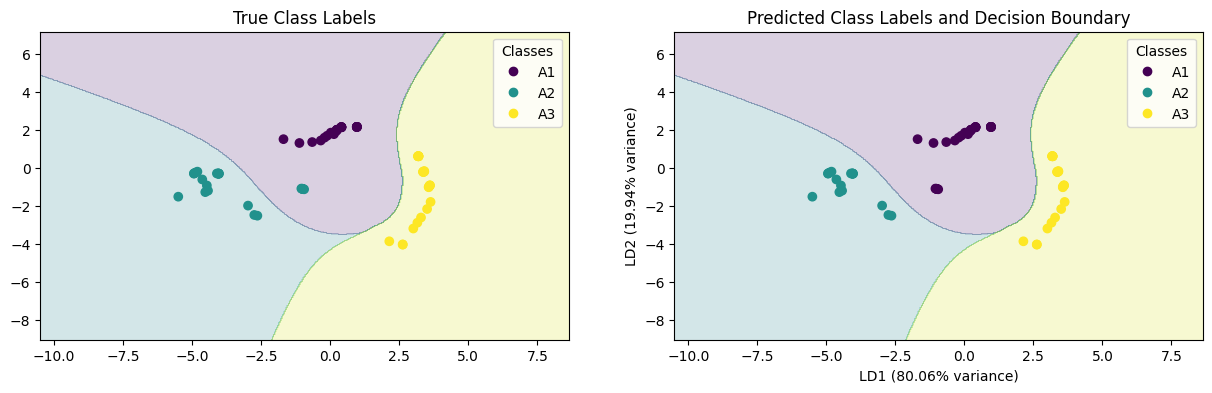

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s4_lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s4_lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, s1_s4_lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


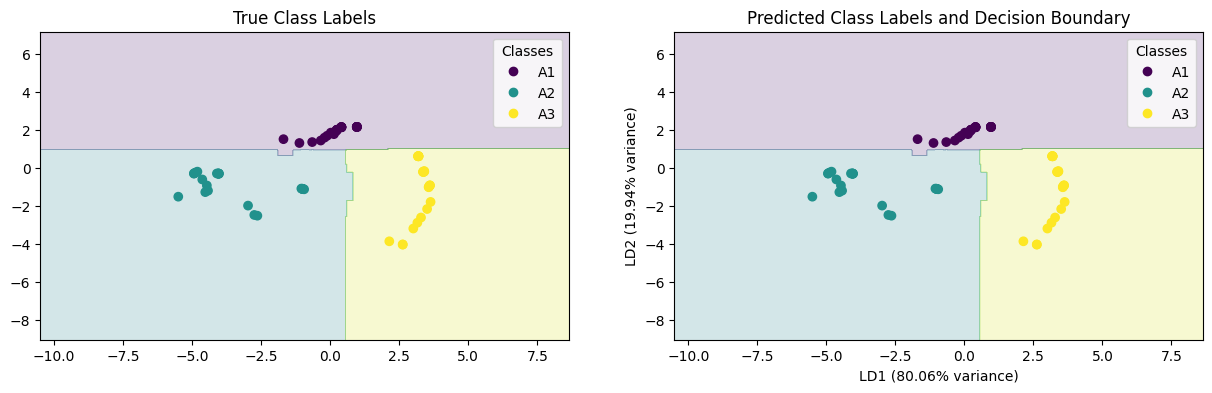

In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, s1_s4_lda_data, rfc, label_mapping)

## LDA using S2, S3

In [17]:
s2_s3_X = data[['Sensor2', 'Sensor3']]

combination.append('S2-S3')

lda = LDA(n_components=2)
X_r = lda.fit_transform(s2_s3_X, Y).T

s2_s3_lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])
s2_s3_lda_data.head()

,LD1,LD2
0,2.151411,0.726124
1,3.315936,0.984793
2,0.923219,-0.566283
3,2.497535,0.782411
4,-3.363881,-0.112209


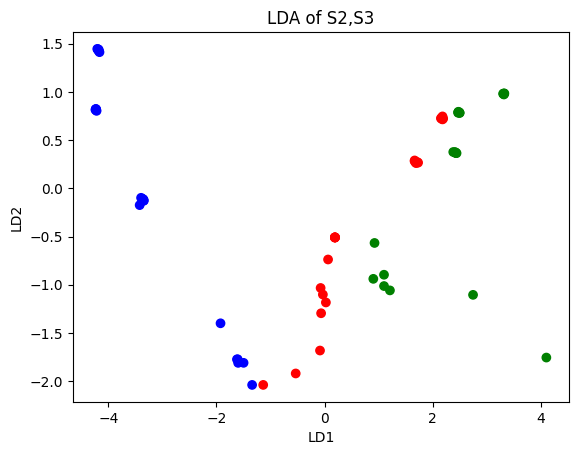

In [18]:
plt.scatter(s2_s3_lda_data['LD1'], s2_s3_lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of S2,S3')
plt.show()

Training accuracy = 0.8333333333333334
Testing accuracy =  0.8666666666666667


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


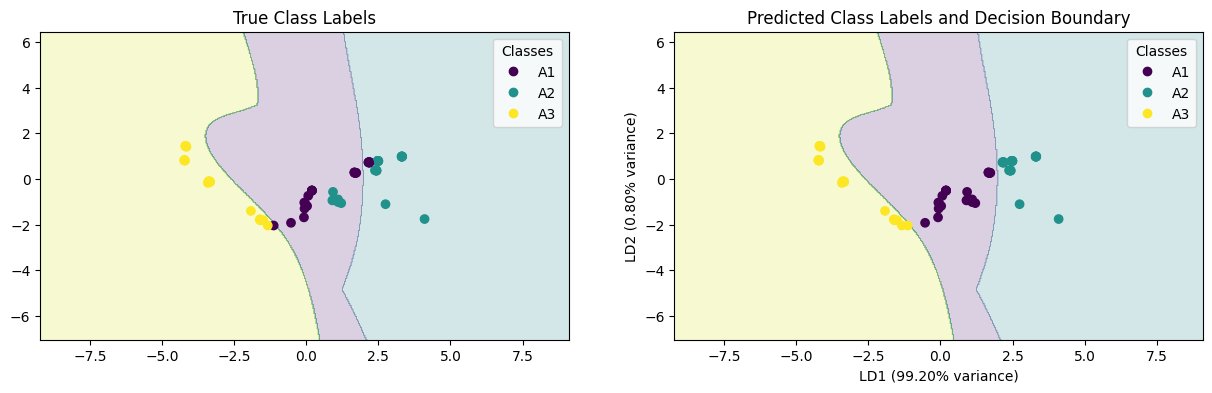

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(s2_s3_lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s2_s3_lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, s2_s3_lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


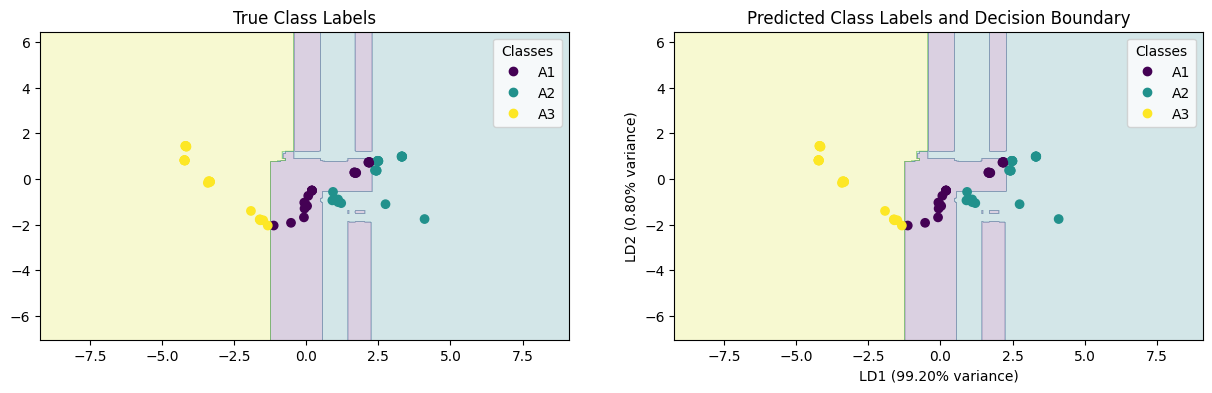

In [20]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, s2_s3_lda_data, rfc, label_mapping)

## LDA using S2, S4

In [21]:
s2_s4_X = data[['Sensor2', 'Sensor4']]

combination.append('S2-S4')

lda = LDA(n_components=2)
X_r = lda.fit_transform(s2_s4_X, Y).T

s2_s4_lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])
s2_s4_lda_data.head()

,LD1,LD2
0,0.533665,2.433466
1,-4.186133,0.926525
2,-2.251862,-1.085004
3,-3.774047,0.399268
4,2.364383,-1.157393


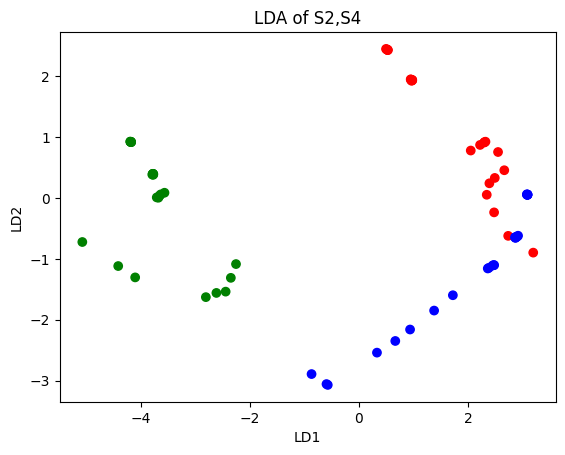

In [22]:
plt.scatter(s2_s4_lda_data['LD1'], s2_s4_lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of S2,S4')
plt.show()

Training accuracy = 0.95
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


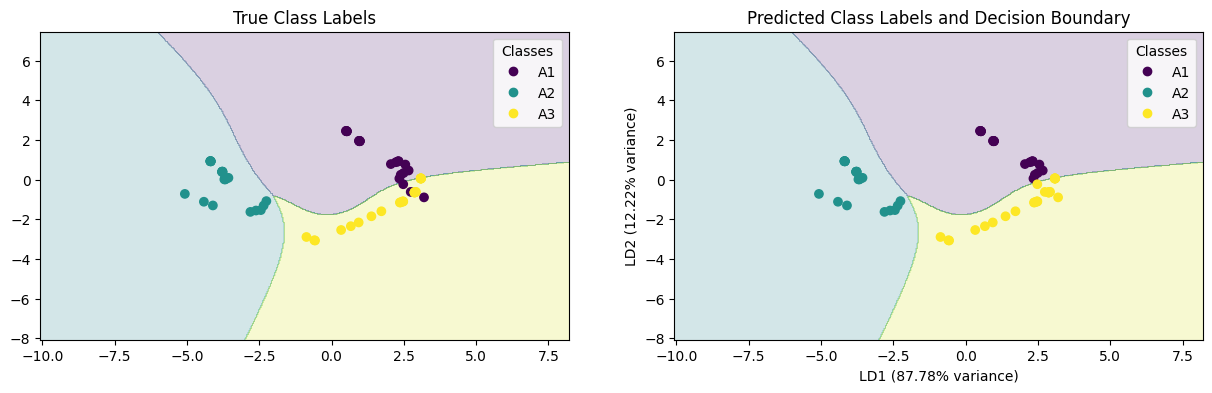

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(s2_s4_lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s2_s4_lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, s2_s4_lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


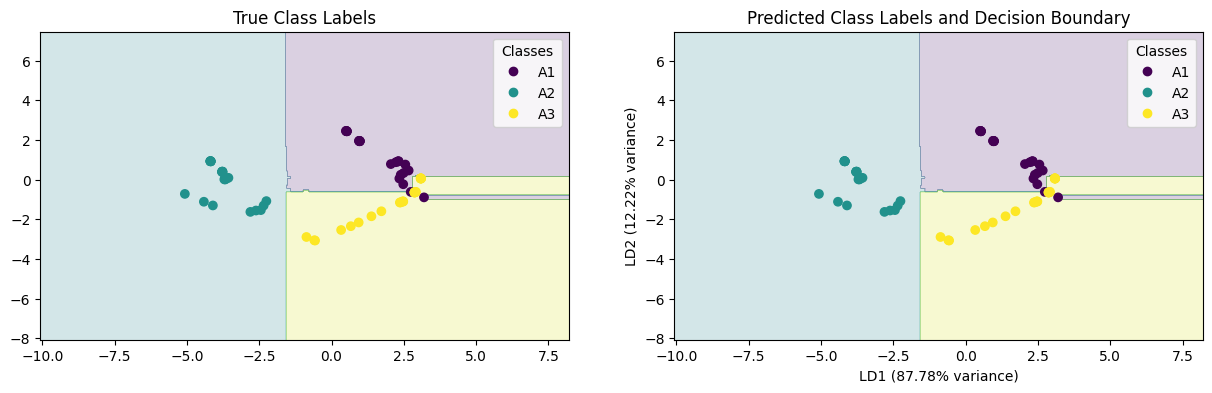

In [24]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, s2_s4_lda_data, rfc, label_mapping)

## LDA using S3, S4

In [25]:
s3_s4_X = data[['Sensor3', 'Sensor4']]

combination.append('S3-S4')

lda = LDA(n_components=2)
X_r = lda.fit_transform(s3_s4_X, Y).T

s3_s4_lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])
s3_s4_lda_data.head()

,LD1,LD2
0,-3.621569,0.802331
1,4.112980,0.570654
2,3.056339,-0.786293
3,4.313585,0.403816
4,-0.307758,0.095900


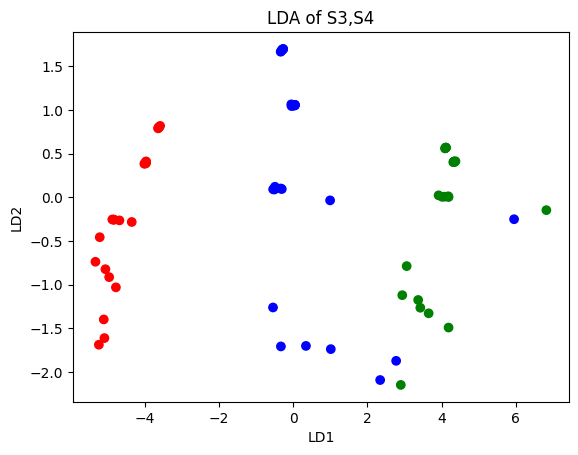

In [26]:
plt.scatter(s3_s4_lda_data['LD1'], s3_s4_lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of S3,S4')
plt.show()

Training accuracy = 0.9833333333333333
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


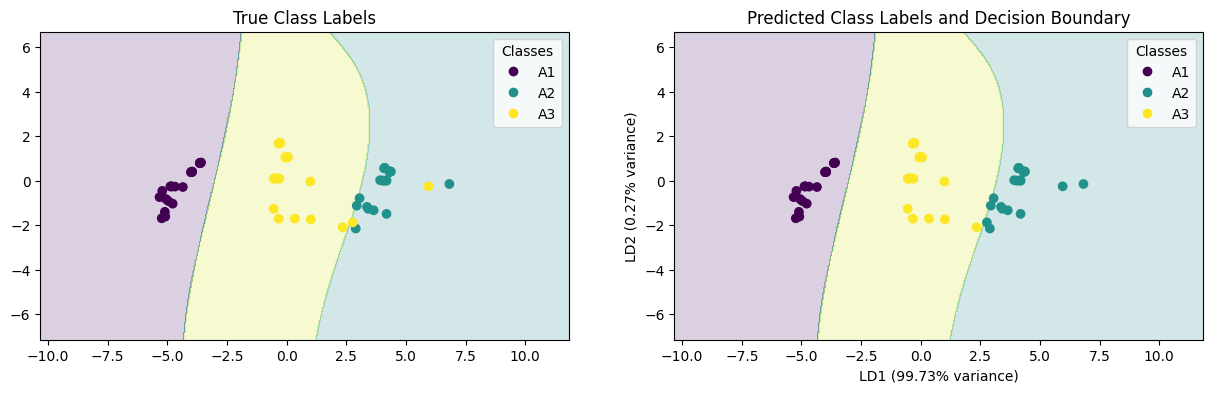

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(s3_s4_lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s3_s4_lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, s3_s4_lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


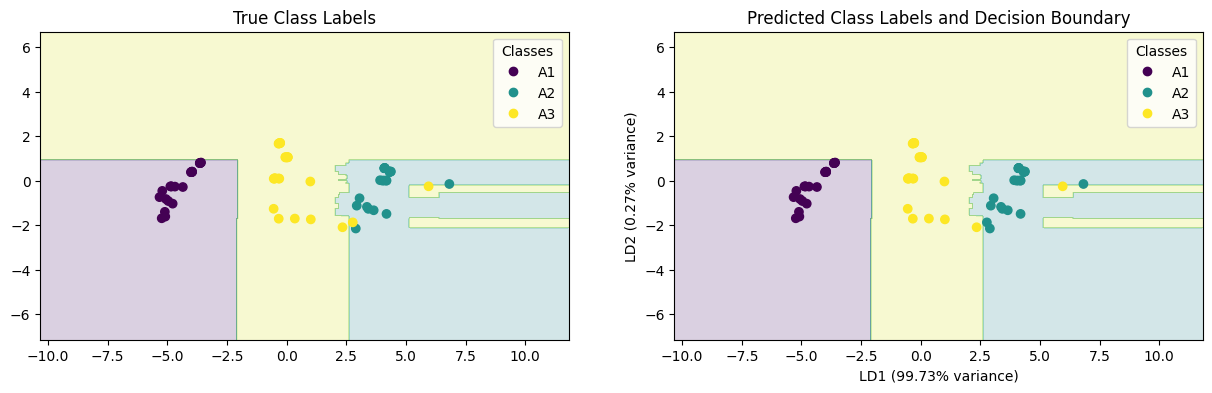

In [28]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, s3_s4_lda_data, rfc, label_mapping)

## LDA using S1, S2, S3 

In [29]:
s1_s2_s3_X = data[['Sensor1','Sensor2','Sensor3']]

combination.append('S1-S2-S3')

lda = LDA(n_components=2)
X_r = lda.fit_transform(s1_s2_s3_X, Y).T

s1_s2_s3_lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])
s1_s2_s3_lda_data.head()

,LD1,LD2
0,2.447186,0.192286
1,4.110555,0.239428
2,5.345276,0.118350
3,6.580513,0.900235
4,-7.733893,-0.127276


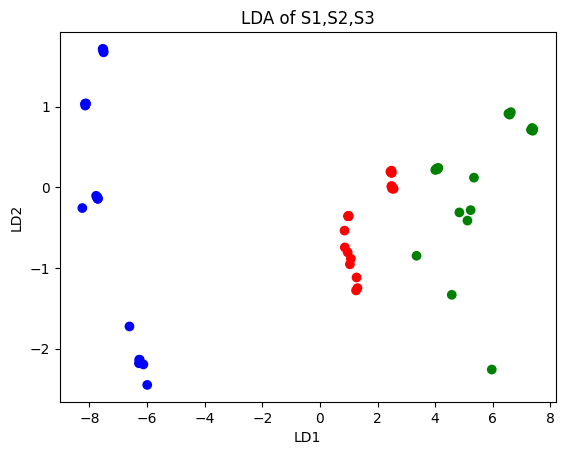

In [30]:
plt.scatter(s1_s2_s3_lda_data['LD1'], s1_s2_s3_lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of S1,S2,S3')
plt.show()

Training accuracy = 0.9
Testing accuracy =  0.9333333333333333


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


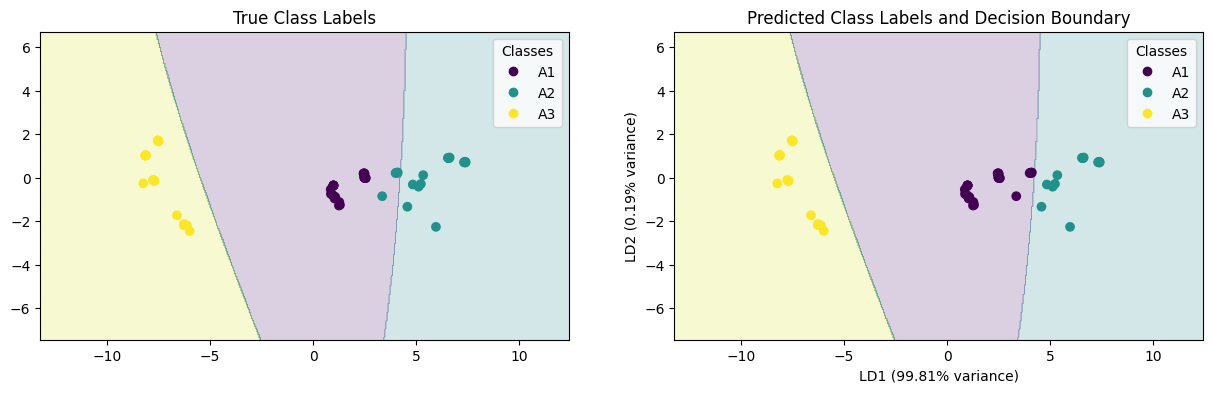

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s2_s3_lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s2_s3_lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, s1_s2_s3_lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


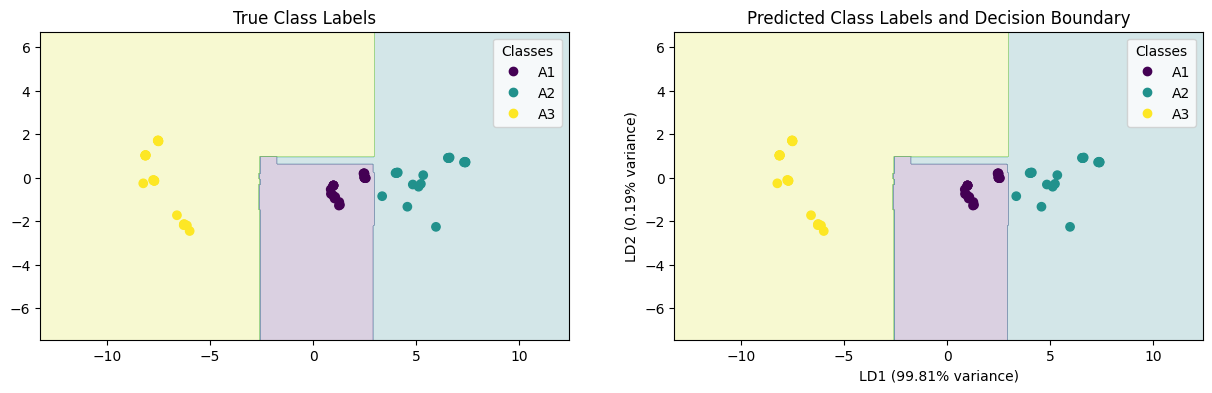

In [32]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, s1_s2_s3_lda_data, rfc, label_mapping)

## LDA using S2, S3, S4

In [33]:
s2_s3_s4_X = data[['Sensor2', 'Sensor3', 'Sensor4']]

combination.append('S2-S3-S4')

lda = LDA(n_components=2)
X_r = lda.fit_transform(s2_s3_s4_X, Y).T

s2_s3_s4_lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])
s2_s3_s4_lda_data.head()

,LD1,LD2
0,-5.319585,-1.501569
1,2.501855,-3.670214
2,2.831336,-1.283622
3,3.224467,-2.934789
4,1.698521,3.176402


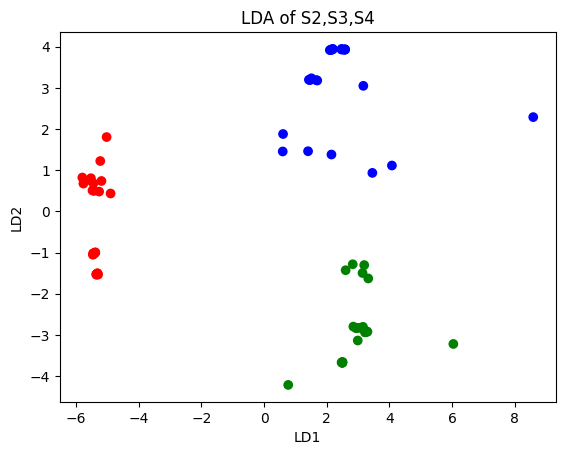

In [34]:
plt.scatter(s2_s3_s4_lda_data['LD1'], s2_s3_s4_lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of S2,S3,S4')
plt.show()

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


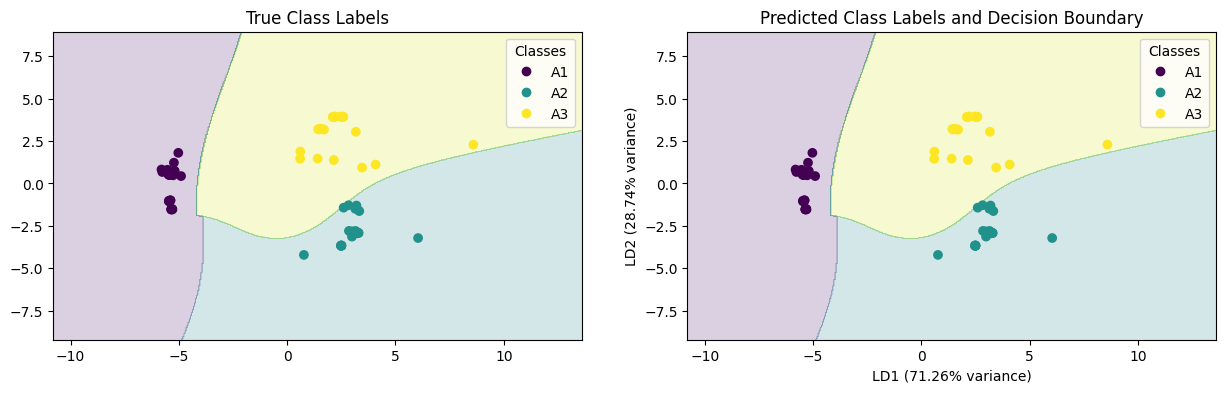

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(s2_s3_s4_lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s2_s3_s4_lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, s2_s3_s4_lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


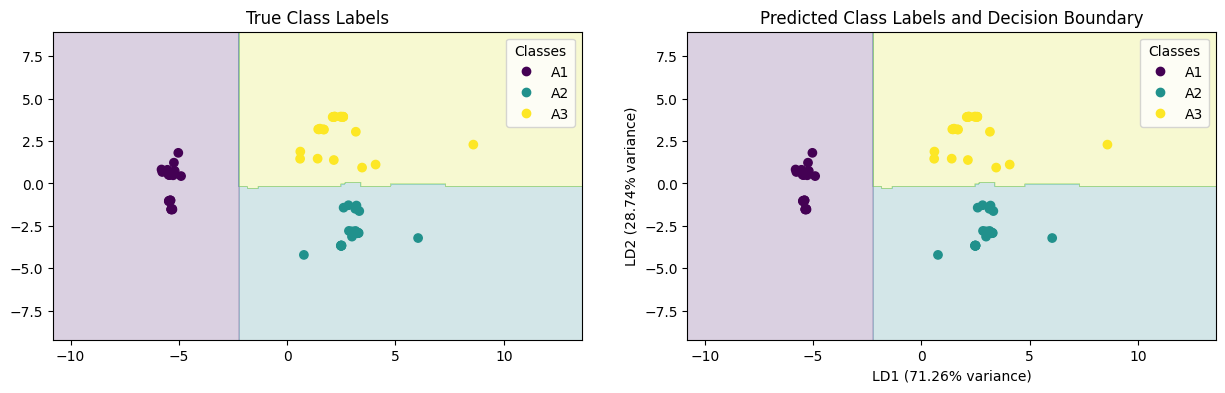

In [36]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, s2_s3_s4_lda_data, rfc, label_mapping)

## LDA using S1, S2, S4

In [37]:
s1_s2_s4_X = data[['Sensor1', 'Sensor2', 'Sensor4']]

combination.append('S1-S2-S4')

lda = LDA(n_components=2)
X_r = lda.fit_transform(s1_s2_s4_X, Y).T

s1_s2_s4_lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])
s1_s2_s4_lda_data.head()

,LD1,LD2
0,0.062664,-2.028050
1,4.633237,1.210145
2,5.720486,0.356054
3,7.082618,0.200812
4,-6.032737,1.087373


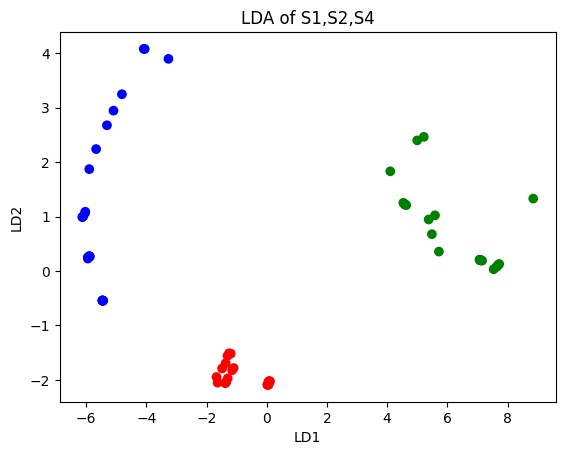

In [38]:
plt.scatter(s1_s2_s4_lda_data['LD1'], s1_s2_s4_lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of S1,S2,S4')
plt.show()

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


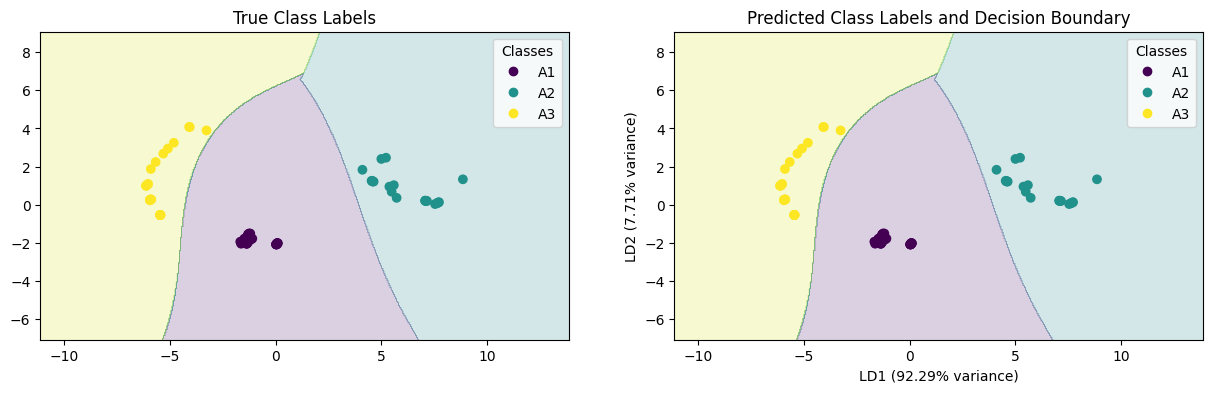

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s2_s4_lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s2_s4_lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, s1_s2_s4_lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


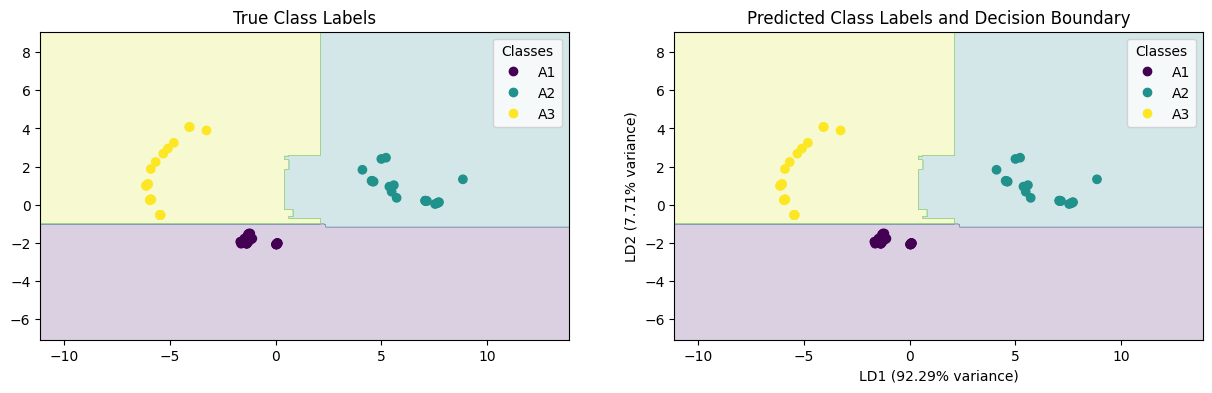

In [40]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, s1_s2_s4_lda_data, rfc, label_mapping)

## LDA using S1, S3, S4

In [41]:
s1_s3_s4_X = data[['Sensor1', 'Sensor3', 'Sensor4']]

combination.append('S1-S3-S4')

lda = LDA(n_components=2)
X_r = lda.fit_transform(s1_s3_s4_X, Y).T

s1_s3_s4_lda_data = pd.DataFrame(data = X_r.T, columns = ['LD1', 'LD2'])
s1_s3_s4_lda_data.head()

,LD1,LD2
0,-3.366324,-1.370000
1,4.027025,1.268393
2,4.833685,-2.329904
3,5.740328,-1.328533
4,-2.115637,3.080826


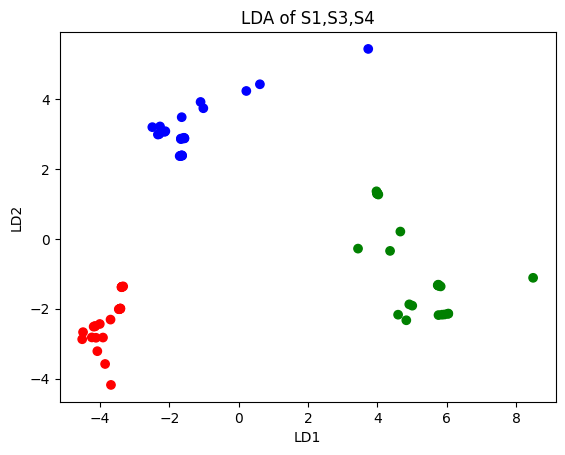

In [42]:
plt.scatter(s1_s3_s4_lda_data['LD1'], s1_s3_s4_lda_data['LD2'], c=Y.map({1:'red', 2:'green', 3:'blue'}))
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of S1,S3,S4')
plt.show()

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


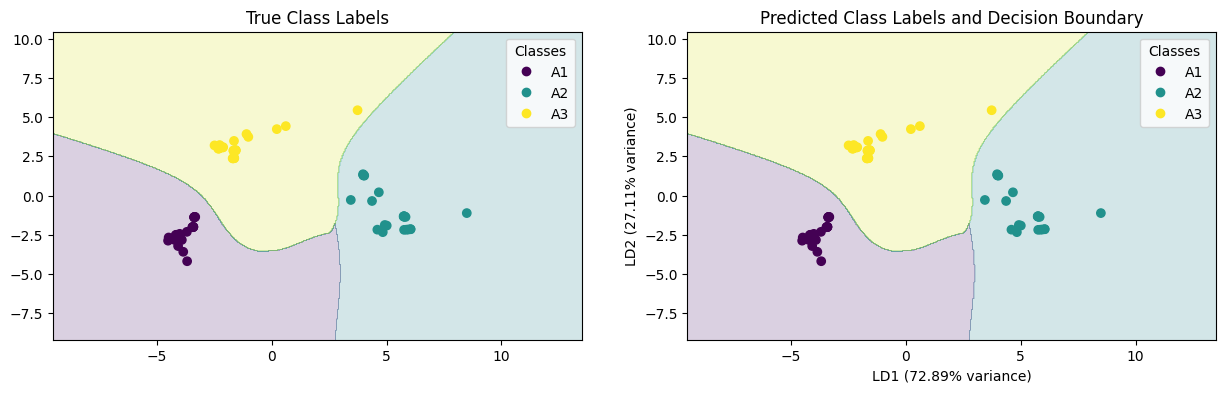

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(s1_s3_s4_lda_data[['LD1','LD2']], Y, test_size=0.2, random_state=42)

svm = SVC(kernel='poly')
svm.fit(X_train, Y_train)

print('Training accuracy =', svm.score(X_train, Y_train))
svm_train_acc.append(svm.score(X_train, Y_train))

print('Testing accuracy = ',svm.score(X_test, Y_test))
svm_test_acc.append(svm.score(X_test, Y_test))

label_mapping = {1:'A1', 2:'A2', 3:'A3'}
s1_s3_s4_lda_data['Labels'] = Y.map(label_mapping)

plot_lda_decision_boundary(lda, s1_s3_s4_lda_data, svm, label_mapping)

Training accuracy = 1.0
Testing accuracy =  1.0


/home/soham/anaconda3/envs/btpenv/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


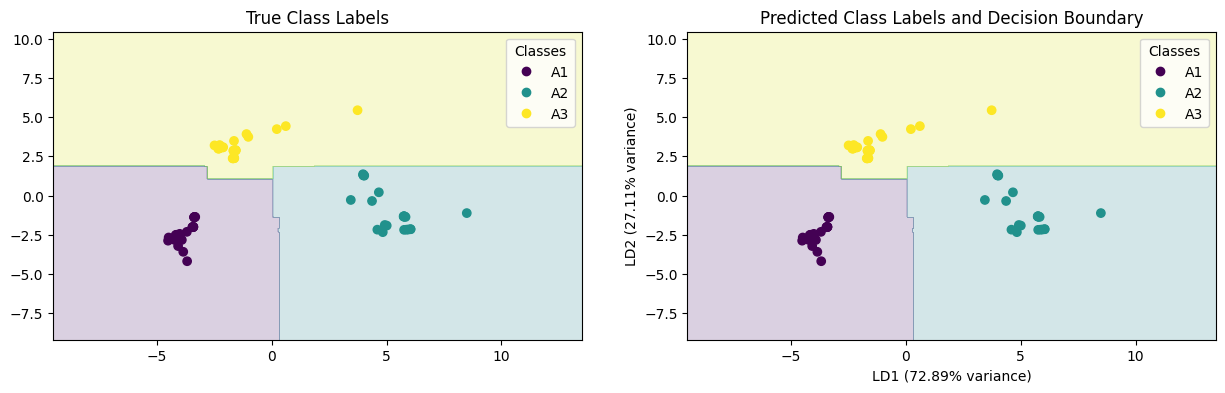

In [44]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

print('Training accuracy =', rfc.score(X_train, Y_train))
rfc_train_acc.append(rfc.score(X_train, Y_train))

print('Testing accuracy = ',rfc.score(X_test, Y_test))
rfc_test_acc.append(rfc.score(X_test, Y_test))

plot_lda_decision_boundary(lda, s1_s3_s4_lda_data, rfc, label_mapping)

## Analysis Graphs

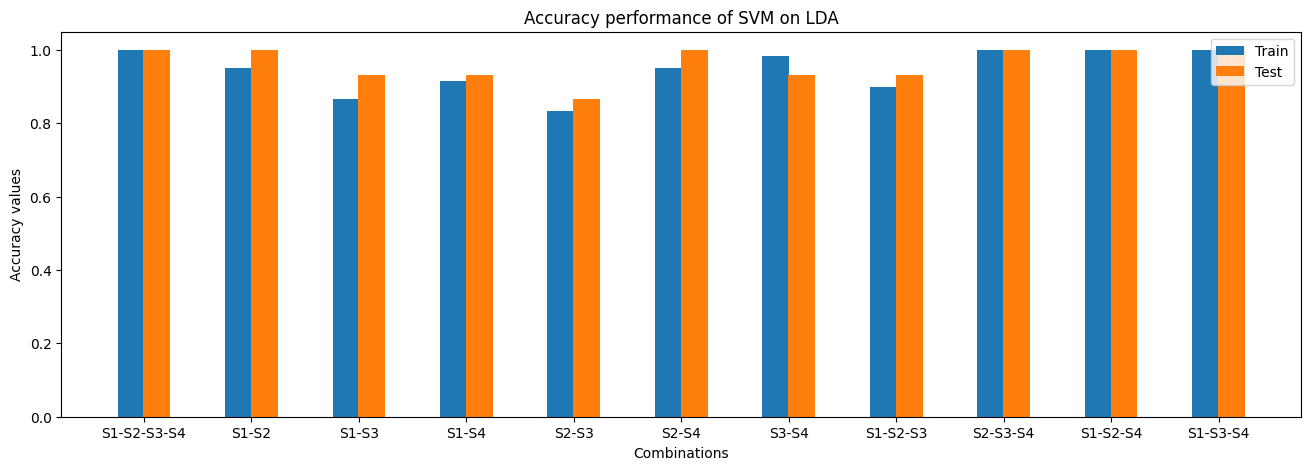

In [45]:
x = [i for i in range(1, 1+len(combination))]
x1 = [i-0.12 for i in x]
x2 = [i+0.12 for i in x]

plt.figure(figsize=(16,5))
plt.bar(x1, svm_train_acc, width=0.25, label='Train')
plt.bar(x2, svm_test_acc, width=0.25, label='Test')
plt.xticks(x, combination)
plt.xlabel('Combinations')
plt.ylabel('Accuracy values')
plt.legend()
plt.title('Accuracy performance of SVM on LDA')
plt.show()

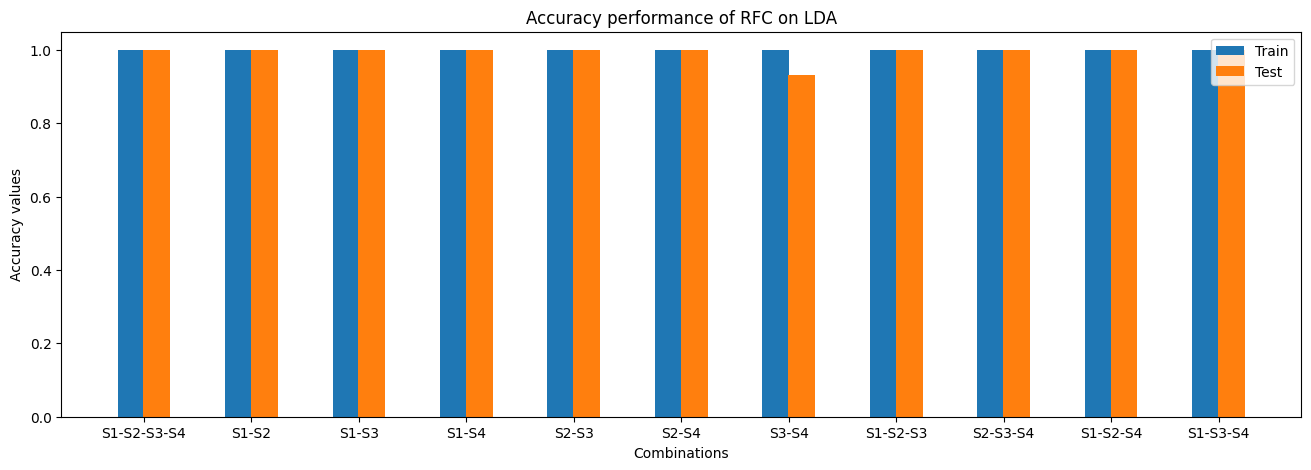

In [46]:
x = [i for i in range(1, 1+len(combination))]
x1 = [i-0.12 for i in x]
x2 = [i+0.12 for i in x]

plt.figure(figsize=(16,5))
plt.bar(x1, rfc_train_acc, width=0.25, label='Train')
plt.bar(x2, rfc_test_acc, width=0.25, label='Test')
plt.xticks(x, combination)
plt.xlabel('Combinations')
plt.ylabel('Accuracy values')
plt.legend()
plt.title('Accuracy performance of RFC on LDA')
plt.show()

In [50]:
accuracy_table = pd.DataFrame({
    'Combination': combination,
    'SVM Train Accuracy': [round(acc, 4)*100 for acc in svm_train_acc],
    'SVM Test Accuracy': [round(acc, 4)*100 for acc in svm_test_acc],
    'RFC Train Accuracy': [round(acc, 4)*100 for acc in rfc_train_acc],
    'RFC Test Accuracy': [round(acc, 4)*100 for acc in rfc_test_acc]
})
accuracy_table

,Combination,SVM Train Accuracy,SVM Test Accuracy,RFC Train Accuracy,RFC Test Accuracy
0,S1-S2-S3-S4,100.00,100.00,100.0,100.00
1,S1-S2,95.00,100.00,100.0,100.00
2,S1-S3,86.67,93.33,100.0,100.00
3,S1-S4,91.67,93.33,100.0,100.00
4,S2-S3,83.33,86.67,100.0,100.00
5,S2-S4,95.00,100.00,100.0,100.00
6,S3-S4,98.33,93.33,100.0,93.33
7,S1-S2-S3,90.00,93.33,100.0,100.00
8,S2-S3-S4,100.00,100.00,100.0,100.00
9,S1-S2-S4,100.00,100.00,100.0,100.00
